# Sampling Timeline Figure

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates

In [6]:
# Import timeline csv
df = pd.read_csv('sampling_timeline.csv', parse_dates=['Tomato_Fertilizer_Trial',
                                                       'Watermelon_Variety_Trial',
                                                       'Pepper_Variety_Trial',
                                                       'Calibration_Trial',])

In [9]:
# replace underscore with space in column names
df.columns = df.columns.str.replace('_', ' ')

In [10]:
print(df)

   Tomato Fertilizer Trial Watermelon Variety Trial Pepper Variety Trial  \
0               2023-06-24               2023-06-25           2023-06-22   
1               2023-07-07               2023-07-06           2023-07-04   
2               2023-07-23               2023-07-24           2023-07-21   
3               2023-08-10               2023-08-11           2023-08-12   
4               2023-08-24                      NaT           2023-08-26   
5                      NaT                      NaT           2023-09-08   
6                      NaT                      NaT           2023-09-21   
7                      NaT                      NaT           2023-10-05   
8                      NaT                      NaT           2023-10-20   
9                      NaT                      NaT                  NaT   
10                     NaT                      NaT                  NaT   

   Calibration Trial  
0         2023-06-24  
1         2023-07-07  
2         2023-08-

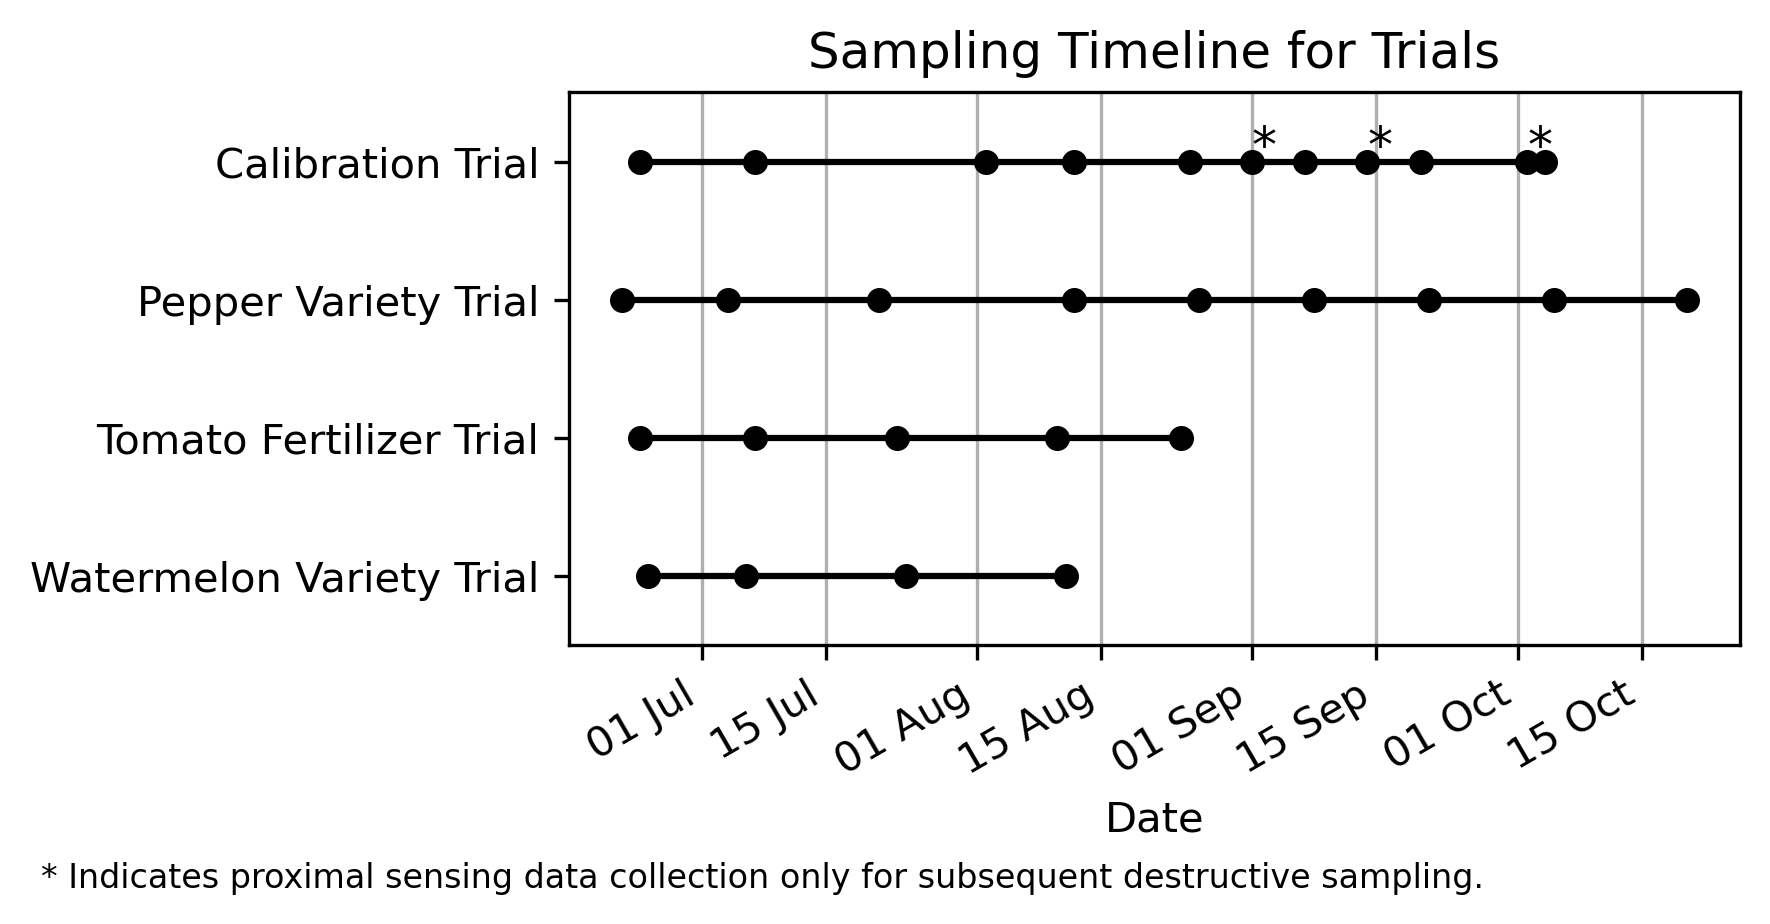

In [67]:
# Create figure
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)

num_trials = len(df.columns)
df = df[sorted(df.columns, reverse=True)]  # Sort columns in reverse order for plotting
y_positions = np.arange(num_trials)

# Create a list of dates for annotation
annotated_dates = [pd.Timestamp('2023-09-01'),
                    pd.Timestamp('2023-09-14'), 
					pd.Timestamp('2023-10-02')]
annotated_trial = 'Calibration Trial'

# Create plot
for i, trial in enumerate(df.columns):
    dates = df[trial].dropna().sort_values()
    ax.plot(dates, [y_positions[i]] * len(dates), 
			'o-', 
			label=trial, 
			color="black", 
			markersize=5)

# add annotations for the specified dates
y = y_positions[df.columns.get_loc(annotated_trial)]
for date in annotated_dates:
	if date in df[annotated_trial].dropna().values:
		ax.text(date, y, "*", color='0.0', fontsize=12)


# Add labels and title
ax.set_yticks(range(len(df.columns)))
ax.set_yticklabels(df.columns)
ax.set_xlabel('Date')
ax.set_title('Sampling Timeline for Trials')
# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.set_ylim(-0.5, num_trials - 0.5)
fig.autofmt_xdate()
# add x-axis grid lines
ax.xaxis.grid(True, linestyle='-')
fig.autofmt_xdate()
plt.tight_layout()
# add footnote
#fig.subplots_adjust(bottom=0.2)
fig.text(-0.45, -0.45, '* Indicates proximal sensing data collection only for subsequent destructive sampling.', ha='left', va='bottom', transform=ax.transAxes, fontsize=8)

#plt.show()
# Save figure
plt.savefig('plot_figs/sampling_timeline.jpg', dpi=300, bbox_inches='tight')